<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/%EA%B8%8D%EC%A0%95%2C_%EB%B3%B4%ED%86%B5_%2C%EB%B6%80%EC%A0%95_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8(%EB%A6%AC%EB%B7%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 리뷰데이터 : 감성 분류 & 긍정 / 부정 키워드 분석


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 사용할 라이브러리 생성.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 데이터 불러오기.
url = '/content/drive/MyDrive/project3  file./train_df_token.csv'

train_df = pd.read_csv(url)

# 컬럼 : 'Unnamed: 0' 을 제거합니다.
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
train_df.head(2)

,리뷰텍스트,label
0,정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?,3.0
1,몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ,3.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11845 entries, 0 to 11844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   리뷰텍스트   11845 non-null  object 
 1   label   11791 non-null  float64
dtypes: float64(1), object(1)
memory usage: 185.2+ KB


In [6]:
# 결측값이 존재하는 행이 있는지 확인합니다.
train_df[train_df['label'].isnull()]

,리뷰텍스트,label
92,"너무 맛있었어요😊 여자친구가 비건 카페를 좋아한다고해서 같이 갔는 데, 비건카페라...",NaN
197,조용하고 뷰도 좋고 가성비 좋은 음식점,NaN
400,1. 입장하면 음료교환권 주는데 추가금은 별도 계산해야합니다. 2. 모닥불이 두 곳...,NaN
747,친절하고 맛있고,NaN
788,코로나로 진짜 오랫만에 갔는데 깔끔해져서 좋아요 ㅎㅎ,NaN
1051,친절해여 커피가 맛있어요 !!,NaN
1128,두딸과 함께 팬케이크 2개짜리를 2번 먹었어요. 달지않고 깔끔한 맛입니다.,NaN
1223,아직 크리스마스 에디션은 많이 없는거 같아요 ㅎㅎ 그래도 예뻤구 케이크 짱 기대됩니...,NaN
1430,친구들하고 내기볼링하러 갔는데 시설도 깔끔하고 분위기도 엄청 좋았어요 직원분들도 친...,NaN
1620,"별내에 칼국수 맛집이 흔하지 않는데, 시원한 멸치국수 맛이 최고여서 자주 이용합니다...",NaN


In [7]:
# 결측값이 존재하는 컬럼 : label에 값을 채워넣습니다. 
train_df.at[92,'label'] = 1
train_df.at[197,'label'] = 1
train_df.at[400,'label'] = 2
train_df.at[747,'label'] = 1
train_df.at[788,'label'] = 1
train_df.at[1051,'label'] = 1
train_df.at[1128,'label'] = 1
train_df.at[1223,'label'] = 1
train_df.at[1430,'label'] = 1
train_df.at[1620,'label'] = 1


train_df.at[1649,'label'] = 1
train_df.at[1900,'label'] = 1
train_df.at[1901,'label'] = 1
train_df.at[1902,'label'] = 1
train_df.at[2046,'label'] = 1


train_df.at[2242,'label'] = 1
train_df.at[2243,'label'] = 1
train_df.at[2244,'label'] = 1
train_df.at[2245,'label'] = 1
train_df.at[2417,'label'] = 1

train_df.at[2420,'label'] = 1
train_df.at[2579,'label'] = 1
train_df.at[2664,'label'] = 1
train_df.at[2969,'label'] = 1
train_df.at[3166,'label'] = 1

train_df.at[3237,'label'] = 1
train_df.at[3498,'label'] = 1
train_df.at[3710,'label'] = 1
train_df.at[3821,'label'] = 1
train_df.at[4017,'label'] = 3

train_df.at[4131,'label'] =1
train_df.at[4144,'label'] =1
train_df.at[4148,'label'] =1
train_df.at[4173,'label'] =1

train_df.at[4223,'label'] = 1
train_df.at[4940,'label'] = 1
train_df.at[5180,'label'] = 1
train_df.at[5284,'label'] = 1
train_df.at[5888,'label'] = 1

train_df.at[5890,'label'] = 1
train_df.at[5949,'label'] = 1
train_df.at[6071,'label'] = 1
train_df.at[6091,'label'] = 1
train_df.at[6220,'label'] = 1


train_df.at[6379,'label'] = 1
train_df.at[6510,'label'] = 1
train_df.at[6536,'label'] = 1
train_df.at[6617,'label'] = 1
train_df.at[6657,'label'] = 1

train_df.at[8874,'label'] = 1
train_df.at[9226,'label'] = 1
train_df.at[9635,'label'] = 1
train_df.at[9661,'label'] = 1
train_df.at[9888,'label'] = 1 

In [8]:
# 행의 결측값을 다시 한 번 확인합니다.
train_df['label'].isnull().sum()

0

In [9]:
# 타겟의 범주가 어떤 비율을 가지고 있는지 확인하기.
train_tg = train_df['label']
train_tg.value_counts(normalize=True)

1.0     0.882989
2.0     0.066442
3.0     0.049979
11.0    0.000507
33.0    0.000084
Name: label, dtype: float64

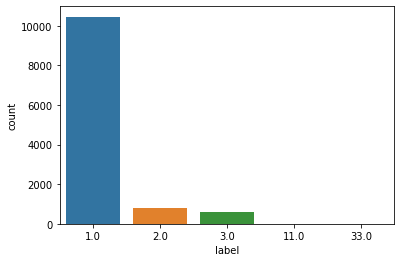

In [10]:
# 타겟 범주 비율을 시각화 합니다.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=train_tg);

In [11]:
# 11 및 3으로 잘못 표기된 값들을 고쳐줍니다. 11 ->1, 33 -> 3

# 먼저 11로 작성된 데이터의 행의 위치를 살펴봅니다.
train_df[train_df['label'] == 11]

# 이후 텍스트를 확인하여 값을 변경해줍니다.
train_df.at[85,'label'] = 1
train_df.at[298,'label'] = 1 
train_df.at[3820,'label'] = 1 
train_df.at[8345,'label'] = 1
train_df.at[9102,'label'] = 1  
train_df.at[9866,'label'] = 1

# 마지막으로 11로 작성된 데이터의 행의 위치를 살펴봅니다.
train_df[train_df['label'] == 33]

# 이후 텍스트를 확인하여 값을 변경해줍니다.
train_df.at[8304,'label'] = 3

In [12]:
train_df[train_df['label'] == 33]

,리뷰텍스트,label


#### 이후 `train_df['label']`의 값을 다시 바꿔줍니다.

* **긍정**은 다음과 같이 표기 합니다. : 1
* **보통**은 다음과 같이 표기 합니다. : 0
* **부정**은 다음과 같이 표기 합니다. : -1 

> 긍정 label은 기존에 사용한 값 1과 일치합니다.<br>
보통 및 부정의 의미를 갖는 2,3번의 값만 바꿔주면 될 것 같습니다.

In [13]:
train_df['label'].replace(2,0, inplace =True)
train_df['label'].replace(3,-1, inplace =True)

In [14]:
# 다시 한 번 값의 범주 비율을 확인합니다.
train_tg = train_df['label']
train_tg.value_counts(normalize=True)

 1.0    0.883495
 0.0    0.066442
-1.0    0.050063
Name: label, dtype: float64

#### 클래스 불균형.
> 1의 값은 만족을 나타내고, 2는 보통, 3은 부정을 나타냅니다.

* 만족을 나타내는 값이 너무 많습니다, 추후 모델이 긍정만을 예측하는 경우가 생깁니다 <br/>

* 긍정리뷰를 잘 예측할 수 있으나, 부통과 부정에 관하여는 정확도가 매우 낮을 수 있습니다.



#### 데이터 전처리 

In [15]:
# 데이터 전처리

# 컬럼: 리뷰텍스트 구간에서 중복된 리뷰가 존재했습니다. 열을 지정하여 중복을 제거합니다.
train_df.drop_duplicates(['리뷰텍스트'], inplace=True)

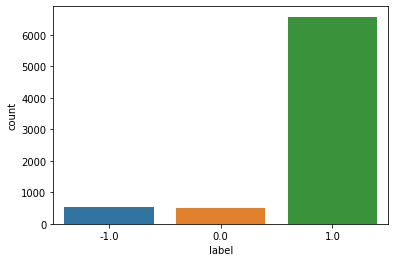

In [16]:
# 타겟 범주 비율을 시각화 합니다.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=train_df['label']);

In [17]:
train_df['label'].value_counts()

 1.0    6570
-1.0     528
 0.0     498
Name: label, dtype: int64

In [18]:
#긍정, 보통 및 불만족에 대한 데이터의 개수는 가장 낮은 보통을 나타내는 데이터의 개수를 기준으로 합니다.

# 개수를 일치하고, 각 값이 속한 인덱스 번호를 추출합니다.

# 긍정
positive_random_idx = train_df[train_df['label'] == 1].sample(498, random_state= 10).index.tolist()

# 보통
normal_random_idx = train_df[train_df['label'] == 0].sample(498, random_state = 10).index.tolist()

# 부정
nagative_random_idx = train_df[train_df['label'] == -1].sample(498, random_state = 10).index.tolist()


# 위에서 생성한 각각의 인덱스 값을 모두 더합니다.
train_random_idx = positive_random_idx + normal_random_idx + nagative_random_idx

In [19]:
# 위에서 가져온 인덱스 리스트 요소를 뽑아 다시 훈련 데이터를 생성합니다.
cleaned_train_df = train_df.loc[train_random_idx]
cleaned_train_df.shape

(1494, 2)

#### 훈련 데이터 리뷰의 전체 길이를 확인해야 합니다.

In [20]:
train_length = train_df['리뷰텍스트'].astype(str).apply(len)

In [21]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 263
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 51.10
리뷰 길이 표준편차: 56.20
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 13.0
리뷰 길이 제3사분위: 70.0


---
## test_data 작업



In [22]:
# 테스트를 진행할 데이터 또한 가져옵니다.
url = '/content/drive/MyDrive/project3  file./test_df_token.csv'
test_df = pd.read_csv(url, encoding = 'utf-8')

# 리뷰텍스트의 "" 값 제거
test_df = test_df[test_df.리뷰텍스트 !=""]
test_df = test_df[test_df.리뷰텍스트 !='없음']
test_df = test_df.dropna()

# 컬럼 : 'Unnamed: 0' 제거.
test_df.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace = True)

In [23]:
test_df.shape

(1212, 2)

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰텍스트   1212 non-null   object
 1   label   1212 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.4+ KB


In [25]:
test_df.head()

,리뷰텍스트,label
0,분위기좋고 대화하기 좋아요,1
1,매장은 넓어 보여 분위기 좋을것같아 방문 청결상태 별로ㅠㅠ 직원분인지 사장님인지 모...,-1
2,굿굿,1
3,조용히 얘기하기 좋아요,1
4,맛있어요,1


#### 테스트 데이터 또한 전처리 작업을 진행합니다.

In [26]:
# 데이터 전처리

# 컬럼: 리뷰텍스트 구간에서 중복된 리뷰가 존재했습니다. 열을 지정하여 중복을 제거합니다.
test_df.drop_duplicates(['리뷰텍스트'], inplace=True)
test_df.shape

(1212, 2)

In [27]:
test_df.head(1)

,리뷰텍스트,label
0,분위기좋고 대화하기 좋아요,1


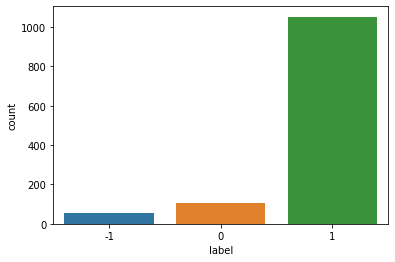

In [28]:
# 테스트 데이터의 label 값들의 분포를 확인합니다.
sns.countplot(x=test_df['label'])

## 모델을 만들기 위한 작업
> 각각의 리뷰 텍스트를 토근화합니다.<br>
❗ 한글 텍스트의 경우, Okt 형태소 분석기를 활용하였습니다.

In [29]:
# 필요한 패키지를 설치합니다.
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 633 kB/s 
     |████████████████████████████████| 453 kB 71.4 MB/s 


In [30]:
# 필요한 라이브러리를 가져옵니다.
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

#### 1. 각 리뷰에 대하여 토큰화 진행
> 함수를 생성하여 진행하도록 하겠습니다.<br/>
먼저 **불용어** 리스트를 생성합니다. 


* 불용어가 담긴 리스트는 `stop_words` 입니다.

In [31]:
### 불용어 생성 코드

# 불용어가 들어가 있는 텍스트 가져오기. 
url = '/content/drive/MyDrive/project3  file./koreanstopword.txt'

with open(url, 'r') as swt:
  
  # 불용어 리스트를 생성합니다, 이 때 각 리스트 요소마다 생기는 개행문자를 제거해즙니다,
  stop_words = [i.strip() for i in swt]

## 완성된 불용어 리스트를 확인합니다,
#stop_words



#### 2. 각 데이터를 전처리 할 수 있는 함수를 생성합니다. 

In [32]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):

  # 지정한 파라미터들은 다음과 같은 역할을 합니다.
 
  #           review : 전처리를 진행할 텍스트
  #              okt : 객체를 반복적으로 생성하지 않고, 미리 생성 후 인자로 받습니다.
  # remove_stopwords : 불용어를 제거할 지에 대한 여부를 선택합니다.
  #       stop_words : 불용어 사전은 사용자가 직접 입력. (기본 값 빈 리스트)

 
  # 1. 한글 및 공백 제외한 문자를 모두 제거합니다.
  #     re.sub(정규표현식, 대상 문자열, 치환 문자)
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
 
  #2. okt 객체를 활용하여 형태소 단어로 나눠줍니다.
  word_review = okt.morphs(review_text,stem=True)
  
  # 불용어 제거하기.
  if remove_stopwords:
    # token에 불용어거 들어있다면, 제외합니다.
    word_review = [token for token in word_review if not token in stop_words]

  return word_review

#### 생성한 함수로 훈련데이터 및 학습 데이터를 전처리합니다.

In [33]:
# 훈련데이터의 리뷰 텍스트를 담는 빈 리스트를 생성합니다.
clean_train_review = []


def train_data_engineering(df):
  okt =Okt()
  for review in df['리뷰텍스트']:

    #리뷰가 문자열인 경우에만 전처리를 진행합니다.
    if type(review) == str:
      clean_train_review.append(preprocessing(review, okt, remove_stopwords= True, stop_words = stop_words))

    #리뷰가 str 행이 아니라면, 공백을 생성합니다.
    else:
      clean_train_review.append([])


# 생성된 함수에 훈련 데이터를 적용합니다.
train_data_engineering(train_df)

#### 최종적으로, 불용어가 제거되고, 토근화가 잘 되었는지 확인합니다. (train_data)

In [34]:
clean_train_review[:4]

[['정말', '다', '맛있다', '난', '먹다', '마다', '탕수육', '냄새', '나다', '끄다'],
 ['짐', '돌아오다', '건지다', '자장', '떡', '먹다', '맘', 'ㅠㅠ'],
 ['매장', '먹다', '더', '맛', '요'],
 ['남자친구', '랑', '먹다', '고온', '곳', '메뉴', '정말', '맛있다']]

In [35]:
# 실전데이터의 리뷰 텍스트를 담는 빈 리스트를 생성합니다.
clean_test_review = []


def train_data_engineering(df):
  okt =Okt()
  for review in df['리뷰텍스트']:

    #리뷰가 문자열인 경우에만 전처리를 진행합니다.
    if type(review) == str:
      clean_test_review.append(preprocessing(review, okt, remove_stopwords= True, stop_words = stop_words))

    #리뷰가 str 행이 아니라면, 공백을 생성합니다.
    else:
      clean_test_review.append([])


# 생성된 함수에 훈련 데이터를 적용합니다.
train_data_engineering(test_df)

#### 최종적으로, 불용어가 제거되고, 토근화가 잘 되었는지 확인합니다. (test_data)

In [36]:
clean_test_review[:4]

[['분위기', '좋다', '대화', '하다', '좋다'],
 ['매장',
  '넓다',
  '보이다',
  '분위기',
  '좋다',
  '방문',
  '청결',
  '상태',
  '별로',
  'ㅠㅠ',
  '직원',
  '분',
  '인지',
  '사장',
  '님',
  '인지',
  '모르다',
  '무뚝뚝하다',
  '매장',
  '먹다',
  '일회용',
  '컵',
  '커피',
  '나오다',
  '좀더',
  '실망',
  '스럽다'],
 ['굿굿'],
 ['조용하다', '얘기', '하다', '좋다']]

####3. 토큰화 한 단어를 컴퓨터가 인식할 수 오 있도록 정수 인코딩을 진행합니다.

In [37]:
from keras.preprocessing.text import Tokenizer
max_words = 20


# num_words ⁉
# 케라스의 토크나이저에서는 (num_words = 숫자)와 같은 방법으로 빈도수가 높은 상위 몇개의 단어에만 사용하겠다고 지정할 수 있습니다.
tokenizer = Tokenizer(num_words = max_words)


# .fit_on_texts() 메소드는 문자 데이터를 입력받아서 리스트의 형태로 변환한다.
# 훈련 데이터만 넣습니다 ❗❗
tokenizer.fit_on_texts(clean_train_review)

X_train = tokenizer.texts_to_sequences(clean_train_review)
X_test = tokenizer.texts_to_sequences(clean_test_review) 


####4. 데이터의 분포별 최대 길이, 평균길이 등을 확인합니다. 

* 훈련 데이터

텍스트의 최대 길이 : 31
텍스트의 최대 길이 : 3.8060821484992102


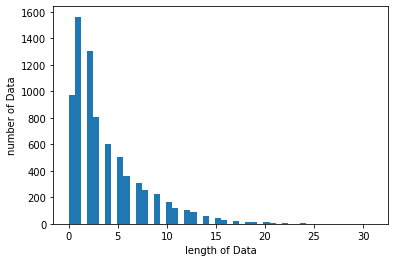

In [38]:
print(f'텍스트의 최대 길이 : {max(len(i) for i in X_train)}')
print(f'텍스트의 최대 길이 : {sum(map(len, X_train))/len(X_train)}')


# bins 파라미터 : 히스토그램의 가로축 구간의 개수를 지정
plt.hist([len(i) for i in X_train], bins= 50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

* 테스트 데이터

텍스트의 최대 길이 : 23
텍스트의 최대 길이 : 2.8036303630363038


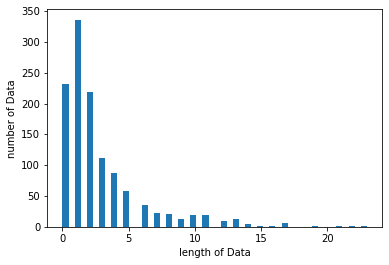

In [39]:
print(f'텍스트의 최대 길이 : {max(len(i) for i in X_test)}')
print(f'텍스트의 최대 길이 : {sum(map(len, X_test))/len(X_test)}')


# bins 파라미터 : 히스토그램의 가로축 구간의 개수를 지정
plt.hist([len(i) for i in X_test], bins= 50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

### 원핫 인코딩 진행하기.
> y_train, y_test 에 들어가는 label 값 1, 0 -1을 컴퓨터가 인식 할 수 있게 합니다.




In [40]:
## 훈련 데이터의 y 값 설정.

y_train = []

for i in range(len(train_df['label'])):
  if train_df['label'].iloc[i] == 1:
    y_train.append([0,0,1])
  
  elif train_df['label'].iloc[i] == 0:
     y_train.append([0,1,0])

  elif train_df['label'].iloc[i] == -1:
     y_train.append([1,0,0])

# array 변환
y_train = np.array(y_train)

## 테스트 데이터의 y값 설정

y_test = []

for i in range(len(test_df['label'])):
  if test_df['label'].iloc[i] == 1:
    y_test.append([0,0,1])
  
  elif test_df['label'].iloc[i] == 0:
     y_test.append([0,1,0])

  elif test_df['label'].iloc[i] == -1:
     y_test.append([1,0,0])


# array 변화
y_test = np.array(y_test)


  

> 변환된 값을 확인합니다.  => `(y_train, y_test)`

In [41]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [42]:
y_test

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [50]:
y_test.shape

TensorShape([1212, 3])

#### 4. 모델을 생성합니다.
> 모델 생성에 필요한 패키지, 라이브러리 등을 import 합니다.

In [43]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [44]:
# 전체 데이터의 길이는 31로 맞추겠습니다.
max_len = 31

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### `EarlyStopping` & `ModelCheckpoint` 을 이용합니다.
> 개선되지 않은 학습에 대한 조기 종료를 실행합니다.




In [45]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import save_model

# Best 모델이 저장되는 파일명.
SAVE_FILE_NM = 'weights.h5'

checkpoint = ModelCheckpoint(SAVE_FILE_NM, monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'auto')


earlystopping = EarlyStopping(monitor = 'val_loss',
                              patience = 10)


In [46]:
# 긍정, 부정, 중립 3가지 분류를 진행합니다.
# -> LSTM, softmax, categorical_crossentropy를 사용합니다.

model = Sequential()
model.add(Embedding(max_words,100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split=0.1,
                    callbacks=[earlystopping, checkpoint])

save_model(model, r'/content/drive/MyDrive/project3  file.')

Epoch 1/10
206/214 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.8618
Epoch 1: val_loss improved from inf to 0.38551, saving model to weights.h5
214/214 [==============================] - 9s 10ms/step - loss: 0.4766 - accuracy: 0.8634 - val_loss: 0.3855 - val_accuracy: 0.8829
Epoch 2/10
212/214 [============================>.] - ETA: 0s - loss: 0.4146 - accuracy: 0.8715
Epoch 2: val_loss improved from 0.38551 to 0.38388, saving model to weights.h5
214/214 [==============================] - 1s 6ms/step - loss: 0.4150 - accuracy: 0.8713 - val_loss: 0.3839 - val_accuracy: 0.8882
Epoch 3/10
206/214 [===========================>..] - ETA: 0s - loss: 0.4123 - accuracy: 0.8721
Epoch 3: val_loss did not improve from 0.38388
214/214 [==============================] - 1s 6ms/step - loss: 0.4107 - accuracy: 0.8730 - val_loss: 0.3860 - val_accuracy: 0.8816
Epoch 4/10
209/214 [============================>.] - ETA: 0s - loss: 0.4070 - accuracy: 0.8737
Epoch 4: val_loss imp

INFO:tensorflow:Assets written to: /content/drive/MyDrive/project3  file./assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/project3  file./assets


#### 이번엔 테스트 파일의 정확도를 확인하여 봅시다.

In [47]:
print('테스트 정확도 : {:.2f}%'.format(model.evaluate(X_test,y_test)[1]*100))

38/38 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8721
테스트 정확도 : 87.21%


#### 새로운 문장을 넣어 판단 할 수 있는 함수를 만들어보도록 합니다.